# Homework 3  
**Ozan Yeşil - 090190325**

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
import scipy.spatial.distance as ssd

from scipy.io import loadmat
from sklearn.cluster import AgglomerativeClustering, DBSCAN
import warnings
warnings.filterwarnings("ignore")

# MAT 388E HW3

## Q1

This is going to be an image classification problem. For this problem we are going to use [the corrected Indian Pines Dataset](https://www.ehu.eus/ccwintco/index.php?title=Hyperspectral_Remote_Sensing_Scenes#Indian_Pines).

1. Download the data (both the corrected dataset and the ground-truth dataset) into a subdirectory called `data`, and ingest it as I did in [Lecture 8](https://github.com/kaygun/2022-Fall-388E/blob/main/lecture-8.ipynb).
2. Instead of using a categorical target variable with 17 classes, from the ground-truth data you ingested create 17 binary classifiers using scikit-learn's [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).

For the steps 3,4, and 5 below write an appropriate function that takes a model type ('LR','SVM', or 'KNN'), the independent variable (the dataset you ingested above) and binary target variable and returns the accuracy score of a properly constructed model given by a 10-fold cross-validation. Use scikitlearn's [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) routines. Record your results from Steps 2,3 and 4 in a pandas data frame.  

3. Construct a logistic regression model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
4. Construct an SVM model for each of the 17 class, and evaluate them using a 10-fold cross-validation. 
5. Construct a KNN model for each of the 17 class and evaluate them using a 10-fold cross-validation. You must determine what would be an appropriate K-value for each class separately, or you may decide to use a single K-value.
6. Display and analyze your cross-validation results in a table. What is the best model overall? What is the best model for each class? 

**1. Download the data (both the corrected dataset and the ground-truth dataset) into a subdirectory called `data`, and ingest it as I did in [Lecture 8](https://github.com/kaygun/2022-Fall-388E/blob/main/lecture-8.ipynb).**

In [158]:
pine = loadmat(r"C:\Users\Ozan\Desktop\OY\data\Indian_pines.mat")['indian_pines']
pine_gt = loadmat(r'C:\Users\Ozan\Desktop\OY\data\Indian_pines_gt.mat')['indian_pines_gt']

X = pine.reshape((145*145,220))
y = pine_gt.reshape(145*145)

**2. Instead of using a categorical target variable with 17 classes, from the ground-truth data you ingested create 17 binary classifiers using scikit-learn's [`LabelBinarizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelBinarizer.html).**

I created a 17 binary classifiers with labelBinarizer() in `cls` variable.

In [159]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()

In [160]:
cls = lb.fit_transform(y)
cls

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

For the steps 3,4, and 5 below write an appropriate function that takes a model type ('LR','SVM', or 'KNN'), the independent variable (the dataset you ingested above) and binary target variable and returns the accuracy score of a properly constructed model given by a 10-fold cross-validation. Use scikitlearn's [cross validation](https://scikit-learn.org/stable/modules/cross_validation.html) routines. Record your results from Steps 2,3 and 4 in a pandas data frame.  


## Necessary Libraries

In [161]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as knn

I wrote a function named `funct` and I will use it in the following steps It takes the model type, independent variable and target variable. And returns the cross validation score.

In [183]:
def funct(model_type, indep_var, targ_var):
    if model_type == 'LR':
        model = LogisticRegression(max_iter=2000)
        score = cross_val_score(model, indep_var, targ_var, scoring='accuracy', cv=10)
        return score
    if model_type == 'SVM':
        model = SVC(kernel='rbf',C=2.0)
        score = cross_val_score(model, indep_var, targ_var, scoring='accuracy', cv=10)
        return score
    if model_type == 'KNN':
        model = knn(n_neighbors=145)
        score = cross_val_score(model, indep_var, targ_var, scoring='accuracy', cv=10)
        return score
        

**3. Construct a logistic regression model for each of the 17 class, and evaluate them using a 10-fold cross-validation.**

In [167]:
logistic_reg = funct('LR', X, y)

In [168]:
logistic_reg

array([0.52401331, 0.67712791, 0.70660961, 0.68806467, 0.7831669 ,
       0.81493815, 0.80399619, 0.69980971, 0.78353949, 0.67649857])

**4. Construct an SVM model for each of the 17 class, and evaluate them using a 10-fold cross-validation.**

In [169]:
svm_model = funct('SVM', X, y)

In [170]:
svm_model

array([0.46837851, 0.54350927, 0.59438897, 0.55159296, 0.62767475,
       0.66317793, 0.66841104, 0.63701237, 0.66555661, 0.62749762])

**5. Construct a KNN model for each of the 17 class and evaluate them using a 10-fold cross-validation. You must determine what would be an appropriate K-value for each class separately, or you may decide to use a single K-value.**

Here I am using a fixed K-value as 145 which is the square root of the row number -> sqrt(N = 21025).

In [184]:
knn_model = funct('KNN', X, cls)

In [185]:
knn_model

array([0.24916786, 0.42938659, 0.32477413, 0.30147408, 0.48549691,
       0.48334919, 0.69077069, 0.58372978, 0.40437678, 0.61655566])

**6. Display and analyze your cross-validation results in a table. What is the best model overall? What is the best model for each class?**

I displayed my results in `table` DataFrame and also printed out the
results.

In [186]:
table = pd.DataFrame()
table['Logistic Regression'] = logistic_reg
table['SVM'] = svm_model
table['KNN'] = knn_model
table

,Logistic Regression,SVM,KNN
0,0.524013,0.468379,0.249168
1,0.677128,0.543509,0.429387
2,0.706610,0.594389,0.324774
3,0.688065,0.551593,0.301474
4,0.783167,0.627675,0.485497
5,0.814938,0.663178,0.483349
6,0.803996,0.668411,0.690771
7,0.699810,0.637012,0.583730
8,0.783539,0.665557,0.404377
9,0.676499,0.627498,0.616556


In [187]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (logistic_reg.mean(), logistic_reg.std()))

0.72 accuracy with a standard deviation of 0.08


In [188]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (svm_model.mean(), svm_model.std()))

0.60 accuracy with a standard deviation of 0.06


In [189]:
print("%0.2f accuracy with a standard deviation of %0.2f" % (knn_model.mean(), knn_model.std()))

0.46 accuracy with a standard deviation of 0.14


With the results above, Logistic Regression has the best accuracy overall and then SVM and finally KNN has the lowest accuracy and the highest standard deviation which makes is the worst model among all 3 models. 

## Q2

For this question, we are going to analyze some [NBA datasets](https://sports-statistics.com/sports-data/nba-basketball-datasets-csv-files/). Specifically, we look at the season 2018-2019.

In [2]:
NBA = pd.read_csv('https://sports-statistics.com/database/basketball-data/nba/2018-19_pbp.csv')
NBA.columns

Index(['Unnamed: 0', 'EVENTMSGACTIONTYPE', 'EVENTMSGTYPE', 'EVENTNUM',
       'GAME_ID', 'HOMEDESCRIPTION', 'NEUTRALDESCRIPTION', 'PCTIMESTRING',
       'PERIOD', 'PERSON1TYPE', 'PERSON2TYPE', 'PERSON3TYPE', 'PLAYER1_ID',
       'PLAYER1_NAME', 'PLAYER1_TEAM_ABBREVIATION', 'PLAYER1_TEAM_CITY',
       'PLAYER1_TEAM_ID', 'PLAYER1_TEAM_NICKNAME', 'PLAYER2_ID',
       'PLAYER2_NAME', 'PLAYER2_TEAM_ABBREVIATION', 'PLAYER2_TEAM_CITY',
       'PLAYER2_TEAM_ID', 'PLAYER2_TEAM_NICKNAME', 'PLAYER3_ID',
       'PLAYER3_NAME', 'PLAYER3_TEAM_ABBREVIATION', 'PLAYER3_TEAM_CITY',
       'PLAYER3_TEAM_ID', 'PLAYER3_TEAM_NICKNAME', 'SCORE', 'SCOREMARGIN',
       'VISITORDESCRIPTION', 'WCTIMESTRING'],
      dtype='object')

1. Using the columns `PLAYER1_TEAM_ABBREVIATION`, `PLAYER2_TEAM_ABBREVIATION`, `PLAYER3_TEAM_ABBREVIATION` construct a 30x30 matrix that has the total number of interactions the teams had with each other during the season.
2. Using the matrix you constructed in the previous step, construct a hiearchical clustering model and split the NBA teams into 2 clusters.
3. NBA Teams are split into 2 Leagues: [The Eastern Conference](https://en.wikipedia.org/wiki/Eastern_Conference_(NBA)) and [The Western Conference](https://en.wikipedia.org/wiki/Western_Conference_(NBA)). What is the relationships of the clusters with these leagues. Explain.
4. Using the columns `PLAYER1_NAME`, `PLAYER2_NAME`, `PLAYER3_NAME` construct a matrix (don't display) that has the total number of interactions the players had during the season with each other. Then keep only the players that has a total of 500 or more interactions during the season, and display the resulting matrix.
5. Using the matrix you constructed in the previous step, draw a dendrogram of the players (with a total of 500 or more interactions), and decide how many clusters are appropriate.
6. Using the matrix and the dendrogram you constructed in the previous steps, construct a hiearchical clustering model for the players and split them into the number of clusters you determined above.

In [57]:
NBA.head()

,Unnamed: 0,EVENTMSGACTIONTYPE,EVENTMSGTYPE,EVENTNUM,GAME_ID,HOMEDESCRIPTION,NEUTRALDESCRIPTION,PCTIMESTRING,PERIOD,PERSON1TYPE,...,PLAYER3_ID,PLAYER3_NAME,PLAYER3_TEAM_ABBREVIATION,PLAYER3_TEAM_CITY,PLAYER3_TEAM_ID,PLAYER3_TEAM_NICKNAME,SCORE,SCOREMARGIN,VISITORDESCRIPTION,WCTIMESTRING
0,0,0,12,2,21800794,NaN,NaN,12:00,1,0.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:11 PM
1,1,0,10,4,21800794,Jump Ball Ayton vs. Faried: Tip to Okobo,NaN,12:00,1,4.0,...,1629059,Elie Okobo,PHX,Phoenix,1.610613e+09,Suns,NaN,NaN,NaN,9:11 PM
2,2,1,5,7,21800794,Jackson Bad Pass Turnover (P1.T1),NaN,11:39,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Harden STEAL (1 STL),9:11 PM
3,3,6,1,9,21800794,NaN,NaN,11:31,1,5.0,...,0,NaN,NaN,NaN,NaN,NaN,2 - 0,-2,Harden 3' Driving Layup (2 PTS),9:12 PM
4,4,2,6,10,21800794,Bridges S.FOUL (P1.T1) (E.Dalen),NaN,11:31,1,4.0,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9:12 PM


**1. Using the columns `PLAYER1_TEAM_ABBREVIATION`, `PLAYER2_TEAM_ABBREVIATION`, `PLAYER3_TEAM_ABBREVIATION` construct a 30x30 matrix that has the total number of interactions the teams had with each other during the season.**

I constructed a matrix named `matrix`.

In [70]:
x12 = NBA.groupby(['PLAYER1_TEAM_ABBREVIATION', 'PLAYER2_TEAM_ABBREVIATION']).size().reset_index().rename(columns={0:'number of interactions'})

In [59]:
teams = x12['PLAYER1_TEAM_ABBREVIATION'].unique()
tbl = pd.DataFrame(columns = teams, index = teams)
for i in tbl.index:
    for j in tbl.index:
        tbl[j][i] = int(x12[x12['PLAYER1_TEAM_ABBREVIATION'] == i][x12['PLAYER2_TEAM_ABBREVIATION'] == j]['number of interactions']) 

In [60]:
for i in tbl.index:
    for j in tbl.index:
        if (i!= j):
            tbl[j][i] = tbl[j][i] + tbl[i][j]

In [61]:
for i in tbl.index:
    for j in tbl.index:
        if (i!= j):
            tbl[j][i] = tbl[i][j] 

In [69]:
x13 = NBA.groupby(['PLAYER1_TEAM_ABBREVIATION', 'PLAYER3_TEAM_ABBREVIATION']).size().reset_index().rename(columns={0:'number of interactions'})

In [63]:
teams = x13['PLAYER1_TEAM_ABBREVIATION'].unique()
tbl1 = pd.DataFrame(columns = teams, index = teams)
for i in tbl1.index:
    for j in tbl1.index:
        tbl1[i][j] = int(x13[x13['PLAYER1_TEAM_ABBREVIATION'] == i][x13['PLAYER3_TEAM_ABBREVIATION'] == j]['number of interactions'])

In [64]:
for i in tbl1.index:
    for j in tbl1.index:
        if (i!= j):
            tbl1[j][i] = tbl1[j][i] + tbl1[i][j]

In [65]:
for i in tbl1.index:
    for j in tbl1.index:
        if (i!= j):
            tbl1[j][i] = tbl1[i][j] 

In [86]:
matrix = tbl + tbl1

In [87]:
matrix

,ATL,BKN,BOS,CHA,CHI,CLE,DAL,DEN,DET,GSW,...,OKC,ORL,PHI,PHX,POR,SAC,SAS,TOR,UTA,WAS
ATL,4643,360,497,425,475,322,236,223,356,224,...,233,436,440,236,200,224,210,321,229,445
BKN,360,3994,430,413,395,408,199,244,331,205,...,212,285,433,205,228,210,176,367,233,414
BOS,497,430,4212,381,262,369,183,194,420,220,...,226,264,386,229,164,210,159,403,220,289
CHA,425,413,381,3923,295,349,171,234,405,203,...,208,347,497,230,206,204,181,293,189,408
CHI,475,395,262,295,3558,352,215,179,374,237,...,262,370,357,203,165,204,177,409,199,422
CLE,322,408,369,349,352,3481,190,201,418,182,...,214,253,281,220,169,148,185,414,201,384
DAL,236,199,183,171,215,190,3917,307,206,411,...,427,168,195,460,430,298,362,214,459,202
DEN,223,244,194,234,179,201,307,4149,192,479,...,447,193,172,465,395,294,355,182,447,181
DET,356,331,420,405,374,418,206,192,3539,190,...,237,372,482,225,184,218,153,312,216,300
GSW,224,205,220,203,237,182,411,479,190,4283,...,332,185,239,450,390,408,276,200,329,193


**2. Using the matrix you constructed in the previous step, construct a hiearchical clustering model and split the NBA teams into 2 clusters.**


I constructed a hiearchical clustering model in `den` into 2 clusters

In [73]:
matrix.columns

Index(['ATL', 'BKN', 'BOS', 'CHA', 'CHI', 'CLE', 'DAL', 'DEN', 'DET', 'GSW',
       'HOU', 'IND', 'LAC', 'LAL', 'MEM', 'MIA', 'MIL', 'MIN', 'NOP', 'NYK',
       'OKC', 'ORL', 'PHI', 'PHX', 'POR', 'SAC', 'SAS', 'TOR', 'UTA', 'WAS'],
      dtype='object')

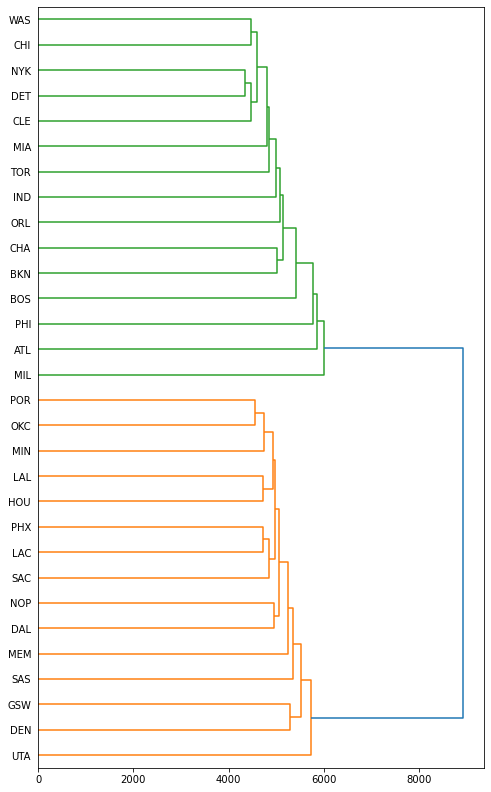

In [79]:
plt.figure(figsize=(8,14))
den = hc.dendrogram(hc.linkage(matrix, method='ward'), orientation='right',labels=matrix.index.to_numpy())

**3. NBA Teams are split into 2 Leagues: [The Eastern Conference](https://en.wikipedia.org/wiki/Eastern_Conference_(NBA)) and [The Western Conference](https://en.wikipedia.org/wiki/Western_Conference_(NBA)). What is the relationships of the clusters with these leagues. Explain.**

In the model we can see that clusters represent the conference seperation. It means that a team interacts more with a team in the same conference than teams in the other conference. It can be explained with the playing frequeency because in the NBA, Eastern Conference teams play more with Eastern Conference than the Western Conference teams during the season. The same thing applies for the Western Conference teams as well. That leads a team to interact more with the teams in the same conference.

**4. Using the columns `PLAYER1_NAME`, `PLAYER2_NAME`, `PLAYER3_NAME` construct a matrix (don't display) that has the total number of interactions the players had during the season with each other. Then keep only the players that has a total of 500 or more interactions during the season, and display the resulting matrix.**

`df1` is the dataframe that has the player name and interaction count.

In [88]:
player_interaction1 = NBA.groupby(['PLAYER1_NAME']).size().reset_index().rename(columns={0:'Number of Interactions'})
player_interaction2 = NBA.groupby(['PLAYER2_NAME']).size().reset_index().rename(columns={0:'Number of Interactions'})
player_interaction3 = NBA.groupby(['PLAYER3_NAME']).size().reset_index().rename(columns={0:'Number of Interactions'})

In [89]:
s1 = player_interaction1.set_index('PLAYER1_NAME')['Number of Interactions']
s2 = player_interaction2.set_index('PLAYER2_NAME')['Number of Interactions']
s3 = player_interaction3.set_index('PLAYER3_NAME')['Number of Interactions']
df1 = (s1+s2+s3).reset_index(name='Total Interaction')

In [90]:
df1 = pd.DataFrame(df1)

In [91]:
df1.columns = ['Player', 'Total Interaction']

**5. Using the matrix you constructed in the previous step, draw a dendrogram of the players (with a total of 500 or more interactions), and decide how many clusters are appropriate.**

`high_interaction` dataframe holds only the players that has at least 500 interactions and the count of interaction. And, I see that **5** clustersare appropriate fot this case.

In [96]:
high_interaction = df1[df1['Total Interaction'] >= 500]
high_interaction['Player'] =  high_interaction.astype('str')

In [97]:
player = high_interaction[['Player']]
interaction = high_interaction[['Total Interaction']]
interaction = pd.DataFrame(interaction)

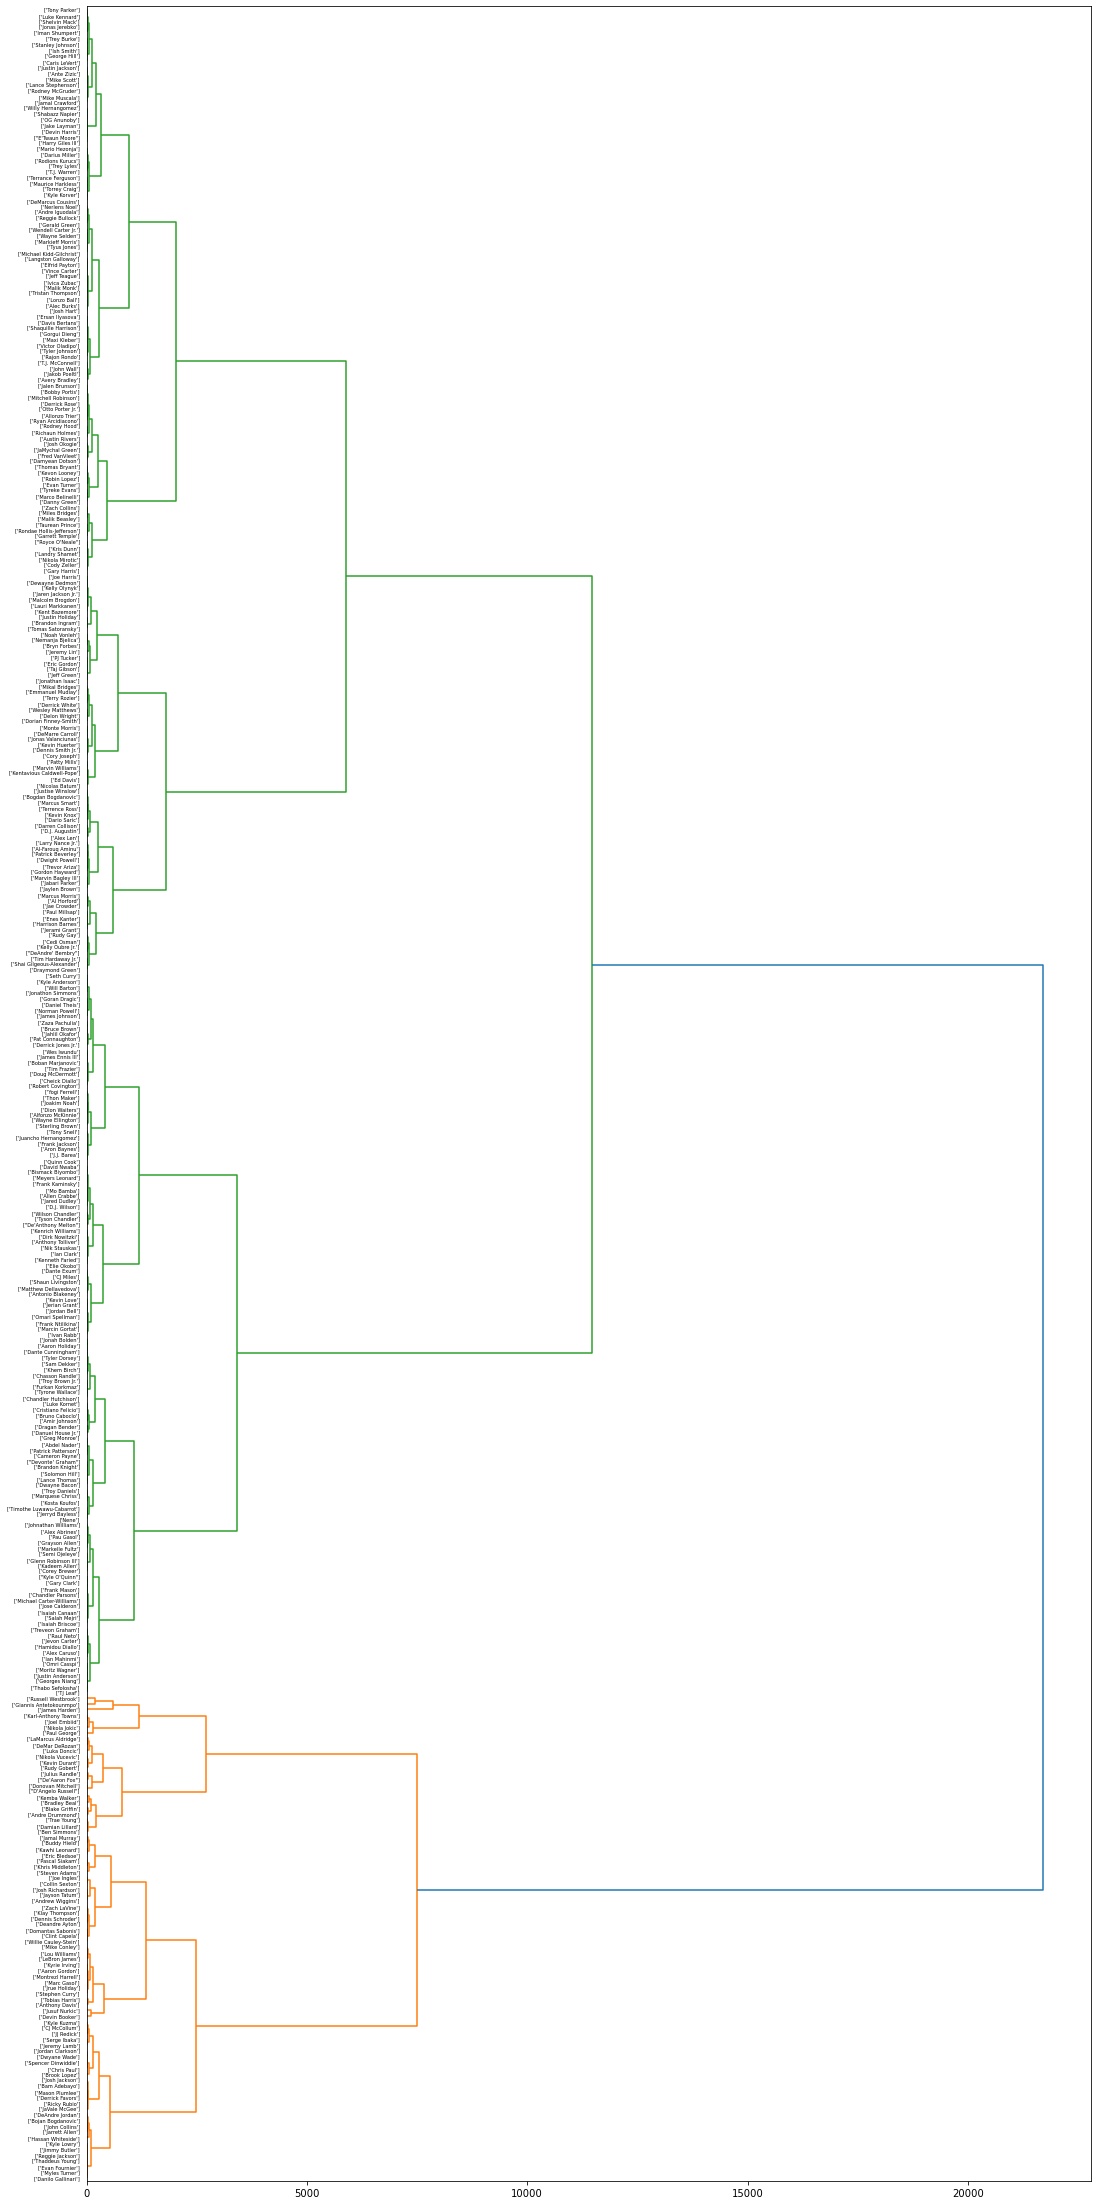

In [98]:
plt.figure(figsize=(18,40))
dendrogram =  hc.dendrogram(hc.linkage(interaction, method='ward'), orientation='right', labels = player.to_numpy())

**6. Using the matrix and the dendrogram you constructed in the previous steps, construct a hiearchical clustering model for the players and split them into the number of clusters you determined above.**

Here, I constructed my model and splitted players into 5 clusters. my model is in `chc` variable and in `clust` dataframe I put players and the clusters of them according to my model.

In [120]:
from sklearn.cluster import AgglomerativeClustering 

In [121]:
chc = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage ='ward')

In [124]:
y_hc=chc.fit_predict(interaction)
y_hc

array([3, 0, 0, 4, 4, 2, 0, 0, 4, 0, 0, 2, 0, 1, 2, 3, 2, 3, 0, 0, 0, 2,
       2, 3, 1, 0, 1, 0, 2, 4, 3, 1, 4, 0, 3, 0, 0, 4, 3, 3, 0, 0, 2, 4,
       0, 0, 0, 0, 3, 3, 2, 3, 0, 4, 0, 1, 4, 0, 1, 2, 0, 3, 2, 0, 0, 0,
       4, 2, 4, 0, 2, 1, 0, 3, 4, 1, 2, 4, 3, 4, 3, 4, 3, 0, 2, 4, 3, 2,
       0, 4, 0, 0, 3, 1, 4, 0, 0, 4, 0, 4, 3, 2, 4, 2, 0, 4, 4, 3, 4, 2,
       3, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 2, 0, 2, 1, 0, 0, 4, 2, 0, 0, 0,
       4, 2, 3, 0, 0, 2, 0, 0, 2, 0, 2, 0, 3, 2, 3, 4, 4, 0, 2, 2, 2, 2,
       3, 0, 1, 0, 0, 4, 3, 4, 3, 4, 2, 4, 3, 4, 0, 0, 0, 3, 0, 4, 3, 1,
       3, 2, 0, 0, 2, 4, 4, 0, 0, 3, 0, 2, 3, 2, 3, 3, 0, 1, 0, 4, 2, 4,
       3, 0, 1, 3, 4, 4, 1, 0, 0, 4, 4, 1, 4, 4, 0, 2, 0, 3, 3, 0, 2, 0,
       2, 3, 3, 0, 3, 1, 2, 0, 2, 2, 4, 4, 3, 2, 3, 1, 2, 0, 4, 2, 2, 3,
       0, 2, 4, 4, 2, 0, 2, 0, 4, 4, 3, 0, 2, 2, 0, 0, 2, 4, 3, 2, 2, 2,
       2, 0, 4, 3, 0, 3, 4, 0, 2, 4, 0, 1, 2, 1, 4, 0, 2, 0, 0, 2, 4, 3,
       0, 4, 0, 4, 0, 1, 4, 0, 2, 0, 2, 3, 2, 3, 0,

In [125]:
clust = pd.DataFrame()
clust['Player'] = list(player['Player'])
clust['Cluster'] = list(y_hc)

In [134]:
clust.head(60)

,Player,Cluster
0,Aaron Gordon,3
1,Aaron Holiday,0
2,Abdel Nader,0
3,Al Horford,4
4,Al-Farouq Aminu,4
5,Alec Burks,2
6,Alex Abrines,0
7,Alex Caruso,0
8,Alex Len,4
9,Alfonzo McKinnie,0
